In [25]:
import glob
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# Declaring The graphs Inline
%matplotlib inline
plt.style.use('ggplot')

# Removing the Filterwarnings
warnings.filterwarnings('ignore')

In [8]:
file = glob.iglob('*.csv')
df = pd.read_csv(*file)
print(df.head())
print('-------------------------------------')
print(df.tail())

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000
-------------------------------------
         Position  Level   Salary
5  Region Manager      6   150000
6         Partner      7   200000
7  Senior Partner      8   300000
8         C-level      9   500000
9             CEO     10  1000000


In [17]:
X = df.iloc[:, 1:-1].values
Y = df.iloc[:, -1].values

In [18]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [19]:
Y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [23]:
# Making the Regression Model
lin_regressor = LinearRegression(n_jobs = -1)
lin_regressor.fit(X, Y)

LinearRegression(n_jobs=-1)

In [44]:
# Trainig the Data on Polynomial Regression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_regressor2 = LinearRegression(n_jobs = -1)
lin_regressor2.fit(X_poly, Y)

LinearRegression(n_jobs=-1)

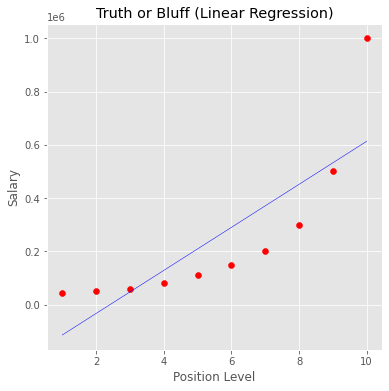

In [45]:
# Plotting The Results

figure = plt.figure(figsize=(6,6))

plt.scatter(X, 
            Y, 
            color='red')

plt.plot(X, 
         lin_regressor.predict(X), 
         color = 'blue', 
         linewidth = 0.5)

plt.title('Truth or Bluff (Linear Regression)')

plt.xlabel('Position Level')

plt.ylabel('Salary')

plt.show()

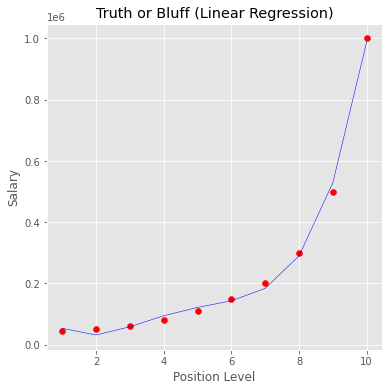

In [46]:
# Plotting The Results

figure = plt.figure(figsize = (6,6))

plt.scatter(X, 
            Y, 
            color='red')

plt.plot(X, 
         lin_regressor2.predict(poly_reg.fit_transform(X)), 
         color = 'blue', 
         linewidth = 0.5)

plt.title('Truth or Bluff (Linear Regression)')

plt.xlabel('Position Level')

plt.ylabel('Salary')

plt.show()

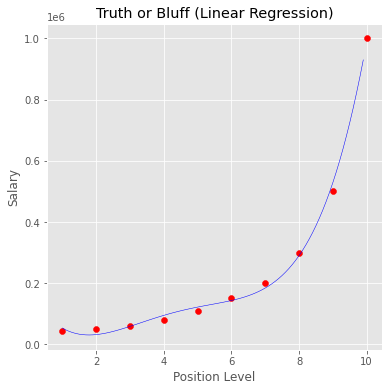

In [48]:
# Smothing out the curve

figure = plt.figure(figsize = (6,6))

X_grid = np.arange(min(X),
                  max(X),
                  0.1)

X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X, 
            Y, 
            color='red')

plt.plot(X_grid, 
         lin_regressor2.predict(poly_reg.fit_transform(X_grid)), 
         color = 'blue', 
         linewidth = 0.5)

plt.title('Truth or Bluff (Linear Regression)')

plt.xlabel('Position Level')

plt.ylabel('Salary')

plt.show()

In [53]:
# Predicting the results

print(lin_regressor.predict([[6.5]]))
print(lin_regressor2.predict(poly_reg.fit_transform([[6.5]])))

[330378.78787879]
[158862.45265155]
